# Incunable editions of books of hours according to Gesamtkatalog der Wiegendrucke

https://www.gesamtkatalogderwiegendrucke.de/docs/HORAE.htm


<a href="https://colab.research.google.com/github/oriflamms/LivreQuanti2023/blob/main/DataModelling/GW-Printers-Booksellers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [1]:
import os, time, csv, requests, re
from bs4 import BeautifulSoup


# Data

In [2]:
url = "https://www.gesamtkatalogderwiegendrucke.de/docs/HORAE.htm"


In [3]:
#  GET request to retrieve the page content
response = requests.get(url)

# Check if request successful (status code 200)
if response.status_code == 200:
    # Retrieve HTML content
    html_content = response.content
    print("HTML page successfully loaded")
else:
    print(f"Request failed with status {response.status_code}")

HTML page successfully loaded


# Sections

In [4]:
# Load HTML with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Select <div> elements with @class 'wcsct' and specific title
Diözesen_div = soup.find('div', class_='wcsct', string='Übersicht der Diözesen (außer Rom)')
Datierte_div = soup.find('div', class_='wcsct', string='Chronologische Übersicht der datierten Ausgaben')
Drucker_div = soup.find('div', class_='wcsct', string='Übersicht nach Druckorten und Druckern')
Verleger_div = soup.find('div', class_='wcsct', string='Verlegerregister')
Bohatta_div = soup.find('div', class_='wcsct', string='Nicht nachweisbare datierte Ausgaben nach Bohatta')
Deutschland_div = soup.find('div', class_='wcsct', string='Deutschland und deutschsprachige Nachbarländer')


## Dioceses

In [5]:
ed_dioc = []
tables_betw_divs = []
GWids = ''

current_element = Diözesen_div.find_next_sibling()
while current_element and current_element != Datierte_div:
    if current_element.name == 'table' and 'reftable' in current_element.get('class', []):
        tables_betw_divs.append(current_element)
    current_element = current_element.find_next_sibling()

for table in tables_betw_divs:
    # print(table)
    label1 = table.select_one('tr td:first-child').get_text(strip=True)
    print(label1)
    
    if table.select_one('tr td:nth-child(2)'):
        GWids = table.select_one('tr td:nth-child(2)').text
        # This regular expression uses a negative assertion (?!Sp\.) and exclude occurrences of "Sp." from being split
        GWids_list = re.split(r'(?<!Sp)\.\s*', GWids)
        # Clean list of GWids
        GWids = [nombre.strip() for nombre in GWids_list]
    
        # Add results to the list
        ed_dioc.append({
            'label1': label1,
            'GWids': GWids
        })

# Display results
print(ed_dioc)
    

Aeduense (Autun)
Ambianense (Amiens)
Andegavense (Angers)
Atrebatense (Arras)
Aurelianense (Orléans)
Autissiodorense (Auxerre)
Baiocense (Bayeux)
Belvacense (Beauvais)
Bisuntinense (Besançon)
Bituricense (Bourges)
Cabilonense (Chalon-sur-Saône)
Cameracense (Cambrai)
Carnotense (Chartres)
Catalaunense (Châlons-sur-Marne)
Cenomanense (Le Mans)
Coloniense (Köln)
Constantiense (Coutances)
Ebroicense (Évreux)
Gebennense (Genf/Genève)
Lemovicense (Limoges)
Leodiense (Liège)
Lexoviense (Lisieux)
Lincopense (Linköping)
Lugdunense (Lyon)
Macloviense (Saint-Malo)
Meldense (Meaux)
Metense (Metz)
Misnense (Meißen)
Namnetense (Nantes)
Noviomense (Noyon)
Parisiense (Paris)
Pictaviense (Poitiers)
Redonense (Rennes)
Remense (Reims)
Rothomagense (Rouen)
Salzeburgense (Salzburg)
Santonense (Saintes)
Sarum (Salisbury)
Scarense (Skara)
Tarantasiense (Tarentaise)
Taruennense (Thèrouanne)
Tolosanum (Toulouse)
Traiectense (Utrecht)
Trecense (Troyes)
Tullense (Toul)
Turonense (Tours)
Turonense (Ecclesia maior

## Places, printers, booksellers

The section "Übersicht nach Druckorten und Druckern" represents an index of all editions with their dates of publication. Each line is stored in a <table/> element, including the places of publication. We will take all the lines in this section and analyse them successively, storing the information about the place of publication for all the subsequent lines. 

The output is a variable that is a list containing all editions in form of dictionaries with values "place", "label1" and "GWids".

In [6]:
place_printer = []
tables_betw_divs = []
current_element = Drucker_div.find_next_sibling()

while current_element and current_element != Verleger_div:
    if current_element.name == 'table' and 'reftable' in current_element.get('class', []):
        tables_betw_divs.append(current_element)
    current_element = current_element.find_next_sibling()

place = ''
    
for table in tables_betw_divs:
    
    if table.select_one('tr td:nth-child(2)'):
        label1 = table.select_one('tr td:first-child').text
        
        ### NOTA BENE : THE FOLLOWING LINE REMOVES SQUARE BRACKETS, THEREFORE ALL INDICATIONS THAT AN INFORMATION PIECE IS NOT IN THE SOURCE
        
        label1 = re.sub(r'[\[\]\s]+', ' ', label1).strip()
        
        # print(label1)

        # Modification de la fonction de split en utilisant une expression régulière
        GWids = table.select_one('tr td:nth-child(2)').text
        GWids_list = re.split(r'(?<!Sp)\.\s*', GWids)
        # Nettoyer les espaces autour de chaque nombre
        GWids_list_propre = [nombre.strip() for nombre in GWids_list]
        GWids = GWids_list_propre

        # print(GWids)

        # Ajouter les résultats à la liste
        place_printer.append({
            'place': place,
            'label1': label1,
            'GWids': GWids
        })
    else:
        place = table.select_one('tr td:first-child').text
        
# Afficher les résultats
print(place_printer)


[{'place': 'Antwerpen', 'label1': 'ohne Drucker , 1488', 'GWids': ['Sp. 701a']}, {'place': 'Antwerpen', 'label1': 'Adriaan van Liesveldt, 22.VI.1494', 'GWids': ['13404']}, {'place': 'Antwerpen', 'label1': 'Adriaan van Liesveldt, 22.VI.1494', 'GWids': ['13405']}, {'place': 'Antwerpen', 'label1': 'Adriaan van Liesveldt, 9.VIII.1494', 'GWids': ['13419']}, {'place': 'Antwerpen', 'label1': 'Adriaan van Liesveldt, 13.(?)VI.1495', 'GWids': ['13406']}, {'place': 'Antwerpen', 'label1': 'Adriaan van Liesveldt, 29.VII.1495', 'GWids': ['13421']}, {'place': 'Antwerpen', 'label1': 'Adriaan van Liesveldt, 1498(?)', 'GWids': ['13422']}, {'place': 'Antwerpen', 'label1': 'Govert Bac, nicht vor 1493', 'GWids': ['13418']}, {'place': 'Antwerpen', 'label1': 'Govert Bac , 1495', 'GWids': ['13420']}, {'place': 'Antwerpen', 'label1': 'Gerard Leeu, 1487', 'GWids': ['13400']}, {'place': 'Antwerpen', 'label1': 'Gerard Leeu, 14 87', 'GWids': ['13399']}, {'place': 'Antwerpen', 'label1': 'Gerard Leeu, 27.VII.1489', 

The value of "label1" is generally "Name of the printer" + comma + "date". But we have to check if it is consistent. In order to be able to deal adequately with the content of "label1" and be able to split the information, we select the values with multiple commas.

In [7]:
# Use a set to collect unique values of the "series" item
unique_series = set(item['label1'] for item in place_printer)

# Convert the set back to a list if needed
unique_series_list = list(unique_series)

# print(unique_series_list)

# Select items with multiple commas
multiple_commas_list = [series for series in unique_series_list if series.count(',') > 1]

print(multiple_commas_list)

['Julian Notary, Jean Barbier und I. H. für Wynkyn de Worde, 3.IV.1497', 'Fratres vitae communis, nicht vor 9.VI.1481, nicht nach 1484', 'Wynkyn de Worde auf Veranlassung von Elisabeth(von York), Königin von England, und Margaret Beaufort, um 1493', 'Lukas Brandis, um 1477/78, nicht nach 1490', 'Christian Snellaert, nicht vor 29.V.1490, nicht nach 10.VIII.1491', 'Drucker von Sixtus IV., Ave Maria (Einbl 389), um 1497(?)', 'Thielmann Kerver für sich selbst, Gilles Remacle und Guillaume Eustace, 14.XI. 1500(?)', 'Johann Gherlinc, nicht vor 15.IV.1489, nicht nach 7.VI.1489(?)', 'Andreas Torresanus für Johann von Köln, Nicolas Jenson und Genossen, 22.XII.1481', 'Gerard Leeu oder Adriaan van Liesveldt, nicht vor 30.IV.1491, nicht nach 1492 oder nicht vor 1493/94, nicht nach 1500']


It appears that except for one more complicated item, we can use the following rule : if there are multiple commas, then: either the last one is followed by a string containing "nicht" and we have to take the string following the second to last comma as the date, or the general rule still applies. In both cases, we have to start from the end, as we do not know how many commas there are.

In [8]:
new_data = []

for statement in place_printer:
    # Create a copy of the dictionary to avoid modifying the original
    entry = statement.copy()
    entry['GWids'] = str(entry['GWids'][0])
    # Split the "label1" using commas
    label1_parts = entry['label1'].split(', ')
    
    if entry['label1'] == 'Gerard Leeu oder Adriaan van Liesveldt, nicht vor 30.IV.1491, nicht nach 1492 oder nicht vor 1493/94, nicht nach 1500':
        entry['printer'] = 'Gerard Leeu oder Adriaan van Liesveldt'
        entry['date'] = 'nicht vor 30.IV.1491, nicht nach 1492 oder nicht vor 1493/94, nicht nach 1500'
    elif len(label1_parts) == 2:
        # If there's only one comma, assign the parts directly
        entry['printer'] = label1_parts[0].strip()
        entry['date'] = label1_parts[1].strip()
    elif len(label1_parts) > 2:
        # If there are multiple commas, check if the last part contains "nicht"
        if "nicht" in label1_parts[-1].strip():
            # If "nicht" is present, take the concatenation of the last two parts as "date"
            entry['printer'] = ', '.join(label1_parts[:-2])
            entry['date'] = ', '.join(label1_parts[-2:])
        else:
            # If "nicht" is not present, take the concatenation of the last two parts as "date"
            entry['printer'] = ', '.join(label1_parts[:-1])
            entry['date'] = ', '.join(label1_parts[-1:])
            
    else:
        entry['printer'] = entry['label1']
    # Remove the original "label1" key
    entry.pop('label1', None)

    # Append the modified entry to the new_data list
    new_data.append(entry)

# Display the modified data
for entry in new_data:
    print(entry)


{'place': 'Antwerpen', 'GWids': 'Sp. 701a', 'printer': 'ohne Drucker', 'date': '1488'}
{'place': 'Antwerpen', 'GWids': '13404', 'printer': 'Adriaan van Liesveldt', 'date': '22.VI.1494'}
{'place': 'Antwerpen', 'GWids': '13405', 'printer': 'Adriaan van Liesveldt', 'date': '22.VI.1494'}
{'place': 'Antwerpen', 'GWids': '13419', 'printer': 'Adriaan van Liesveldt', 'date': '9.VIII.1494'}
{'place': 'Antwerpen', 'GWids': '13406', 'printer': 'Adriaan van Liesveldt', 'date': '13.(?)VI.1495'}
{'place': 'Antwerpen', 'GWids': '13421', 'printer': 'Adriaan van Liesveldt', 'date': '29.VII.1495'}
{'place': 'Antwerpen', 'GWids': '13422', 'printer': 'Adriaan van Liesveldt', 'date': '1498(?)'}
{'place': 'Antwerpen', 'GWids': '13418', 'printer': 'Govert Bac', 'date': 'nicht vor 1493'}
{'place': 'Antwerpen', 'GWids': '13420', 'printer': 'Govert Bac', 'date': '1495'}
{'place': 'Antwerpen', 'GWids': '13400', 'printer': 'Gerard Leeu', 'date': '1487'}
{'place': 'Antwerpen', 'GWids': '13399', 'printer': 'Gerard 

The following code allows to check the values of the different fields

In [9]:

key = 'printer'

# Use a set to collect unique values of one of the keys in the items when the key is present
unique_series = set(item[key] for item in new_data if key in item)
# Convert the set back to a list if needed
unique_series_list = list(unique_series)

print('\n'.join(unique_series_list))

Philippe Pigouchet für sich selbst und die Brüder de Marnef
Thielmann Kerver für Jean Petit in Paris und Pierre Cochery in Le Mans
Jean Bouyer
Jacques Le Forestier für Robert Macé in Caen
Friedrich Peypus für Johann Koberger
Anton Sorg
Jacques Le Forestier
Jakob Wolff
Jean Trechsel
Albrecht Kunne
Jean Bonhomme
Johann Zainer d.Ä.
Drucker von Sixtus IV., Ave Maria (Einbl 389)
Philippe Pigouchet für Jean Richard in Rouen
Etienne Jehannot oder Jean Jehannot
Johann Leoviller
Lukas Brandis
Wynkyn de Worde
Theodorus de Ragazonibus
Drucker des Celtis (Johann Kachelofen)
Jean Du Pré für Antoine Caillaut
Jean Morand für Geoffroi de Marnef
Albert Ravenstein und Joachim Westval
Johann Higman für Willem Houtmaert in Antwerpen
Pierre Le Dru und Etienne Jehannot für Robin Challot
Drucker der Getzijden (GW 12997)
Pierre Le Rouge für Vincent Commin
Georg Wolff und Thielmann Kerver für Geoffroi de Marnef
Francesco di Dino
Antoine Chappiel für Germain Hardouyn
Etienne Jehannot für Pierre Regnault in Caen

In the printer fiel, we see that some are acting in behalf of booksellers. The information is given in the statement "N." + "für" + "N.". We separate both information pieces.

In [10]:
new_data2 = []

for statement in new_data:
    # Create a copy of the dictionary to avoid modifying the original
    entry = statement.copy()
    
    
    if 'für' in entry['printer']:
        # print(entry['printer'])
        # Split the "printer" 
        entry['bookseller'] = entry['printer'].split('für')[1].strip()
        entry['printer'] = entry['printer'].split('für')[0].strip()

    if entry['printer'] == '':
        entry.pop('printer', None)
    # Append the modified entry to the new_data list
    new_data2.append(entry)

# Display the modified data
for entry in new_data2:
    print(entry)


{'place': 'Antwerpen', 'GWids': 'Sp. 701a', 'printer': 'ohne Drucker', 'date': '1488'}
{'place': 'Antwerpen', 'GWids': '13404', 'printer': 'Adriaan van Liesveldt', 'date': '22.VI.1494'}
{'place': 'Antwerpen', 'GWids': '13405', 'printer': 'Adriaan van Liesveldt', 'date': '22.VI.1494'}
{'place': 'Antwerpen', 'GWids': '13419', 'printer': 'Adriaan van Liesveldt', 'date': '9.VIII.1494'}
{'place': 'Antwerpen', 'GWids': '13406', 'printer': 'Adriaan van Liesveldt', 'date': '13.(?)VI.1495'}
{'place': 'Antwerpen', 'GWids': '13421', 'printer': 'Adriaan van Liesveldt', 'date': '29.VII.1495'}
{'place': 'Antwerpen', 'GWids': '13422', 'printer': 'Adriaan van Liesveldt', 'date': '1498(?)'}
{'place': 'Antwerpen', 'GWids': '13418', 'printer': 'Govert Bac', 'date': 'nicht vor 1493'}
{'place': 'Antwerpen', 'GWids': '13420', 'printer': 'Govert Bac', 'date': '1495'}
{'place': 'Antwerpen', 'GWids': '13400', 'printer': 'Gerard Leeu', 'date': '1487'}
{'place': 'Antwerpen', 'GWids': '13399', 'printer': 'Gerard 

Both following cells are used to check the values from the different fields. The first one in relation to GW-ids, the second as an index.

In [11]:
for data in new_data2: 
    print(data.get("GWids"), data.get("printer"))

Sp. 701a ohne Drucker
13404 Adriaan van Liesveldt
13405 Adriaan van Liesveldt
13419 Adriaan van Liesveldt
13406 Adriaan van Liesveldt
13421 Adriaan van Liesveldt
13422 Adriaan van Liesveldt
13418 Govert Bac
13420 Govert Bac
13400 Gerard Leeu
13399 Gerard Leeu
13401 Gerard Leeu
13417 Gerard Leeu
13403 Gerard Leeu
13402 Gerard Leeu oder Adriaan van Liesveldt
12982 Anton Sorg
12983 Anton Sorg
12945 Anton Sorg
12946 Anton Sorg
12947 Anton Sorg
12981 Günther Zainer
13439 Johann Gherlinc
13440 Johann Gherlinc
12949 Johann Amerbach
12948 Bernhard Richel
12950 Michael Wenssler
12951 Jakob Wolff
13390 Ugo Rugerius
13407 William Caxton
13423 Fratres vitae communis
13427 Hendrik Eckert
13428 Hendrik Eckert
13424 Jakob van der Meer
13425 Jakob van der Meer
13426 Christian Snellaert
12944 ohne Drucker
13408 Richard Paffraet
13409 Richard Paffraet
13410 Richard Paffraet
13329 Andreas Belfortis
13330 Laurentius de Rubeis
Sp. 695a ohne Drucker
13391 Apud S. Jacobum de Ripoli
13332 Francesco di Dino
13

In [12]:
key = 'printer'
# Use a set to collect unique values of a "key" in item when the key is present
unique_series = set(item[key] for item in new_data2 if key in item)
# Convert the set back to a list if needed
unique_series_list = list(unique_series)
print('\n'.join(unique_series_list))

Jean Bouyer
Anton Sorg
Jacques Le Forestier
Jakob Wolff
Jean Trechsel
Albrecht Kunne
Jean Bonhomme
Johann Zainer d.Ä.
Drucker von Sixtus IV., Ave Maria (Einbl 389)
Guillaume Anabat
Etienne Jehannot oder Jean Jehannot
Johann Leoviller
Lukas Brandis
Wynkyn de Worde
Theodorus de Ragazonibus
Drucker des Celtis (Johann Kachelofen)
Albert Ravenstein und Joachim Westval
Drucker der Getzijden (GW 12997)
Francesco di Dino
Peter Drach d.M.
Nicolaus de Benedictis
Philippe Pigouchet
Bartholomäus Ghotan(?)
Jacobinus Suigus und Nicolaus de Benedictis
Denis Meslier
Jean Bouyer und Pierre Bellescullée
Jean Du Pré
Konrad Dinckmut
Etienne Larcher
Pierre Roffet
Georg Wolff und Thielmann Kerver
Adriaan van Liesveldt
Laurentius de Morgianis und Johann Petri
Guillaume Le Rouge
Drucker des Henricus Ariminensis (Georg Reyser)
Laurentius de Rubeis
Fratres vitae communis
Ugo Rugerius
Jean de Vingle(?)
Antonius Zarotus
Drucker der Rochuslegende (H 13928)
Wilhelm Schaffener
Johann Grüninger
Christian Snellaert
Th

# Printers and booksellers of books of hours as a network (Export edges)

In the variable "new_data2", we have a list of dictionaries describing each edition with the information "place", "printer", "bookseller", "date", "GWids" if they exist. 
The following cell creates a list of "edges", with each couple "printer+bookseller", the number of occurrences, the list of GWids and the list of dates, both separated by the character "|".

In [13]:
import csv

# Sample list of dictionaries
list_of_dicts = new_data2

# Create a CSV file with the specified columns
csv_file_path = 'output.csv'

# Create a CSV file with the specified columns and delimiter
csv_file_path = 'output.csv'

with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['printer', 'bookseller', 'weight', 'GWids', 'date', 'place']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames, delimiter=';')

    # Write the header to the CSV file
    writer.writeheader()

    # Create a dictionary to keep track of weights and other values
    data_dict = {}

    # Iterate through the list of dictionaries
    for entry in list_of_dicts:
        printer = entry.get('printer', '')
        bookseller = entry.get('bookseller', '')
        gwids = entry.get('GWids', '')
        date = entry.get('date', '')
        place = entry.get('place', '')

        # Calculate the weight based on the combination of 'printer' and 'bookseller'
        key = (printer, bookseller)
        data_key = (printer, bookseller, gwids, date)
        data_dict.setdefault(key, {'weight': 0, 'GWids': set(), 'date': set(), 'place': set()})

        # Increment the weight and add GWids, date, and place to the sets
        data_dict[key]['weight'] += 1
        data_dict[key]['GWids'].add(gwids)
        data_dict[key]['date'].add(date)
        data_dict[key]['place'].add(place)

    # Write the grouped data to the CSV file
    for (printer, bookseller), values in data_dict.items():
        writer.writerow({
            'printer': printer,
            'bookseller': bookseller,
            'weight': values['weight'],
            'GWids': '|'.join(values['GWids']),
            'date': '|'.join(values['date']),
            'place': '|'.join(values['place'])
        })

print(f"CSV file '{csv_file_path}' has been created.")


CSV file 'output.csv' has been created.


## graph

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [15]:
# Load your CSV file into a DataFrame
# The CSV file should have two columns, let's call them 'Node1' and 'Node2'
# Each row represents an edge between Node1 and Node2
csv_file_path = './output.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_file_path, sep=';')
df

,printer,bookseller,weight,GWids,date,place
0,ohne Drucker,NaN,11,Sp. 487a|Sp. 674a|Sp. 654a|Sp. 712a|13321|1294...,|1488|um 1500|um 1494(?)|nicht vor 1493|um 147...,Antwerpen|Rouen|Paris|Deutschland(?)|Florenz|V...
1,Adriaan van Liesveldt,NaN,6,13419|13404|13406|13421|13422|13405,9.VIII.1494|1498(?)|22.VI.1494|29.VII.1495|13....,Antwerpen
2,Govert Bac,NaN,2,13418|13420,nicht vor 1493|1495,Antwerpen
3,Gerard Leeu,NaN,6,13417|13400|13399|13403|13413|13401,um 1483/84|13.III.1492|14 87|1487|27.VII.1489|...,Antwerpen|Gouda
4,Gerard Leeu oder Adriaan van Liesveldt,NaN,1,13402,"nicht vor 30.IV.1491, nicht nach 1492 oder nic...",Antwerpen
...,...,...,...,...,...,...
218,Julian Notary,NaN,1,13028,2.IV.1500,Westminster
219,Wynkyn de Worde auf Veranlassung von Elisabeth...,NaN,1,13025,um 1493,Westminster
220,Wynkyn de Worde,NaN,2,13026|13027,um 1493/94|um 1494,Westminster
221,Georg Coci und Genossen,NaN,1,13446,30.VII.1500,Zaragoza


The created dataframe contains many rows with "NaN" values, most of times when there is no bookseller information, sometimes when there is no printer information. We will filter out this rows.

In [16]:
filtered_df = df.dropna(subset=['printer', 'bookseller'])
filtered_df

,printer,bookseller,weight,GWids,date,place
42,"Julian Notary, Jean Barbier und I. H.",Wynkyn de Worde,1,13017,3.IV.1497,London
54,Nicolaus de Benedictis,Boninus de Boninis,2,13038|13037,20.III.1499|20.V.1499,Lyon
56,Jacobinus Suigus und Nicolaus de Benedictis,Boninus de Boninis,1,Sp. 429a,26.VIII.1500 vielmehr 1501,Lyon
68,Martin von Amsterdam,Andreas Ihyracensis,1,13350,27.I.1499,Neapel
71,Christian Preller,Antoine Gontier,1,13343,9.IV.1490,Neapel
...,...,...,...,...,...,...
201,Johann Hamann,Gerard Barrevelt und Frederick Egmondt,1,13377,1494,Venedig
202,Johann Hamann,Johann Volkarth,1,13380,14.XI.1495,Venedig
203,Johann Hamann,Octavianus Scotus,1,13385,1.X.1497,Venedig
205,Nicolas Jenson,? Raphael Zovenzonius,1,13357,um 1475,Venedig


Number of nodes: 87
Number of edges: 72


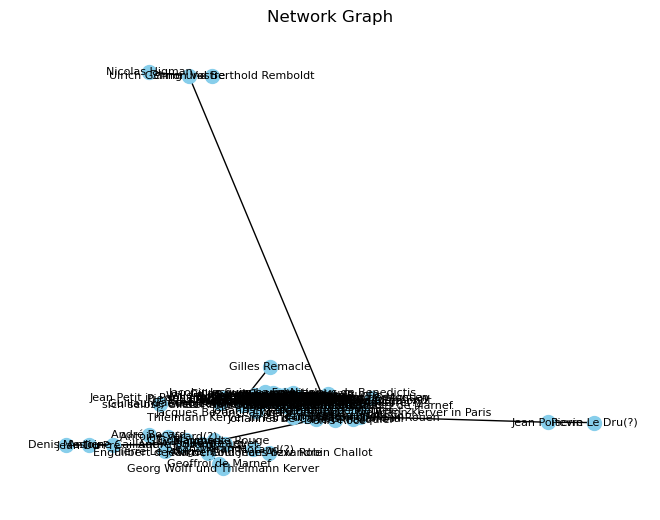


Degree Centrality:
Node Julian Notary, Jean Barbier und I. H.: 0.0116
Node Wynkyn de Worde: 0.0116
Node Nicolaus de Benedictis: 0.0116
Node Boninus de Boninis: 0.0233
Node Jacobinus Suigus und Nicolaus de Benedictis: 0.0116
Node Martin von Amsterdam: 0.0116
Node Andreas Ihyracensis: 0.0116
Node Christian Preller: 0.0116
Node Antoine Gontier: 0.0116
Node Friedrich Peypus: 0.0116
Node Johann Koberger: 0.0116
Node Guillaume Anabat: 0.0116
Node Gilles und Germain Hardouyn: 0.0116
Node André Bocard: 0.0233
Node Antoine Vérard(?): 0.0233
Node André Bocard(?): 0.0116
Node Antoine Vérard: 0.1279
Node Antoine Caillaut: 0.0233
Node Antoine Chappiel: 0.0116
Node Germain Hardouyn: 0.0116
Node Jean Du Pré: 0.0349
Node Denis Meslier: 0.0116
Node Ulrich Gering und Berthold Remboldt: 0.0116
Node Simon Vostre: 0.0349
Node Johann Higman: 0.0116
Node Willem Houtmaert in Antwerpen: 0.0116
Node Nicolas Higman: 0.0116
Node Etienne Jehannot: 0.1047
Node Johannes de Campis in Cambrai: 0.0116
Node Pierre Regn

In [17]:
# Create an empty graph
G = nx.Graph()

# Add edges from the DataFrame to the graph

# G.add_edges_from(filtered_df[['printer', 'bookseller']].values)
G.add_weighted_edges_from(filtered_df[['printer', 'bookseller', 'weight']].values)

# Print basic information about the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Draw the network graph
pos = nx.kamada_kawai_layout(G)  # You can use different layout algorithms 
                                            #spring_layout 
                                            #fruchterman_reingold_layout 
                                            #kamada_kawai_layout
nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=8)
plt.title('Network Graph')
plt.show()

# Perform network analysis
degree_centrality = nx.degree_centrality(G)
print("\nDegree Centrality:")
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality:.4f}")

# You can explore more network analysis metrics and functions provided by NetworkX
# For example, betweenness_centrality, closeness_centrality, etc.

Creating an interactive graph

In [21]:

import plotly
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objects as go
print("plotly : ", plotly.__version__)


# Compute node positions using the spring layout algorithm
pos = nx.spring_layout(G)

# Create a Plotly figure
fig = go.Figure()

# Add nodes to the figure using go.Scatter
for node, (x, y) in pos.items():
    fig.add_trace(go.Scatter(
        x=[x],
        y=[y],
        mode='markers',
        marker=dict(size=10, color='skyblue'),
        text=node,
        hoverinfo='text'
    ))

# Add edges to the figure using go.Scatter
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]

    fig.add_trace(go.Scatter(
        x=[x0, x1, None],
        y=[y0, y1, None],
        mode='lines',
        line=dict(color='black', width=1),
        hoverinfo='none'
    ))

# Set layout options
fig.update_layout(
    showlegend=False,
    title='Printers and Bookseller of Incunables Books of Hours',
    hovermode='closest'
)

# Show the figure
fig.show()


# Write the figure to an HTML file
pio.write_html(fig, file='GW-Printers-Booksellers-interactive_network_graph.html')

plotly :  5.9.0
